In [1]:
import numpy as np
import tensorflow as tf
from sklearn.neural_network import MLPClassifier as mlp
from utilities import *
from sklearn.metrics import confusion_matrix
import sys
import os


In [2]:
def personalResults(predY, testY):
    predClass = np.argmax(predY,1)
    C = confusion_matrix(np.argmax(testY,1).ravel(), predClass.ravel(), np.arange(n_classes))
    np.set_printoptions(suppress=True)
    return C

In [3]:
n_classes = 7
ret = 0
#IDs = ['100','101','103','105','106','108','109','111','112','113','114','115','116','117','118','119','121','122','123','124','200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234'] # all records
#IDs = ['200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215', '219', '220', '221', '222', '223', '228', '230', '231', '232', '233', '234']
IDs = ['100','101','103','105','106','108','109','200', '201', '202', '203', '205', '207', '208', '209', '210', '212', '213', '214', '215'] # all records
allCs={}
outArr = np.zeros((1,8)) # array of 8 elements for the output
runs = np.random.permutation(np.arange(1, 10))*ret#['_1', '_2', '_3', ..., '_50']
out_path = 'finalResults.csv'
os.system('rm ' + out_path)



0

We will load predicted output of alpha and beta model and cascade them. Then we will pass it to MLP which will give us final result.
<img src="/Blend.gif" style="width:800px;height:300px;">

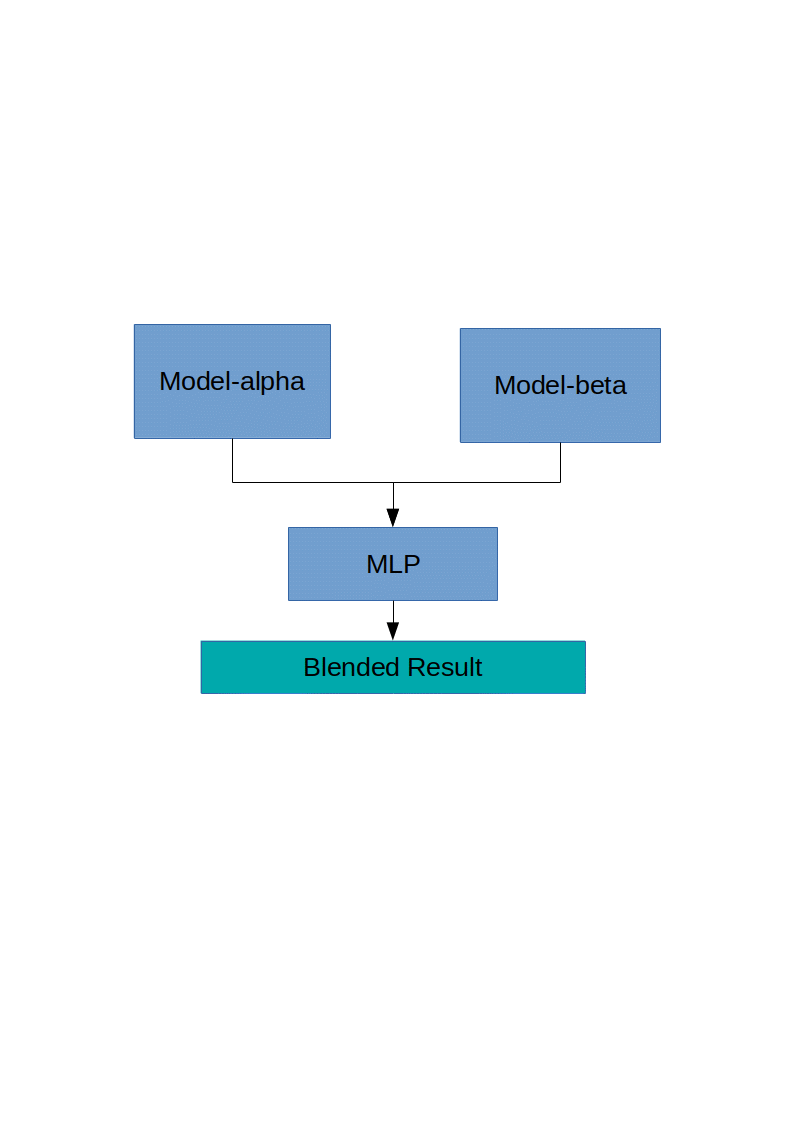

In [6]:
for run in runs:
    print("blending models ...")

    # loop over all patients
    for ID in IDs:

        # load X data of two models for training
        XB = np.load('../preds/trainB_outs_'+str(run)+'_' + str(ret)+'/' + ID + '_predY.npy')
        XA = np.load('../preds/trainA_outs_'+str(run)+'_' + str(ret)+'/' + ID + '_predY.npy')
        if(np.size(XA,0)!=np.size(XB,0)):
            XB = XB[0:np.size(XA,0),:]
        XB = np.argmax(XB,1)
        XB = np.eye(n_classes)[XB.astype(int)]
        XA = np.argmax(XA,1)
        XA = np.eye(n_classes)[XA.astype(int)]

        # make train data by both models
        trainX = np.concatenate((XB,XA),1)
        trainY = np.load('../Data/label/' + ID + '/trainYcat.npy')
        correct=0
        wrong=0
        # fit a mlp model
        clf = mlp(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(80,10), random_state = 1)
        clf.fit(trainX, trainY)

        # load X data of two models for testing
        testX_B = np.load('../preds/testB_outs_'+str(run)+'_' + str(ret)+'/' + ID + '_predY.npy')
        testX_A = np.load('../preds/testA_outs_'+str(run)+'_' + str(ret)+'/' + ID + '_predY.npy')
        testX = np.concatenate((testX_B,testX_A),1)

        # get the outputs of the model
        predY = clf.predict(testX)

        # calculate the accuracies
        testY = np.load('../Data/label/' + ID + '/testYcat.npy')
        predClass = np.argmax(predY,1)
        actClass  = np.argmax(testY,1)
        for i in range(0,predClass.shape[0]):
            if predClass[i]==actClass[i]:
                correct=correct+1
            else:
                wrong=wrong+1
        print("correct=",correct,"wrong=",wrong)
        C = personalResults(predY, testY)
        allCs[ID] = C

    #outArr += calc_tables(allCs, n_classes)
#outArr /= np.size(runs)

# save the results in csv file
#print("final results:\n", outArr)
with open(out_path, 'ab') as out_handle:
    np.savetxt(out_handle, outArr, delimiter=',')


blending models ...
correct= 1901 wrong= 1
correct= 1518 wrong= 5
correct= 1720 wrong= 9
correct= 2149 wrong= 6
correct= 1694 wrong= 2
correct= 1471 wrong= 9
correct= 2089 wrong= 10
correct= 2120 wrong= 48
correct= 1424 wrong= 97
correct= 1814 wrong= 57
correct= 2415 wrong= 66
correct= 2184 wrong= 17
correct= 1461 wrong= 131
correct= 2359 wrong= 78
correct= 2361 wrong= 158
correct= 2162 wrong= 42
correct= 2285 wrong= 0
correct= 2588 wrong= 112
correct= 1874 wrong= 5
correct= 2792 wrong= 3
blending models ...
correct= 1901 wrong= 1
correct= 1518 wrong= 5
correct= 1720 wrong= 9
correct= 2149 wrong= 6
correct= 1694 wrong= 2
correct= 1471 wrong= 9
correct= 2089 wrong= 10
correct= 2120 wrong= 48
correct= 1424 wrong= 97
correct= 1814 wrong= 57
correct= 2415 wrong= 66
correct= 2184 wrong= 17
correct= 1461 wrong= 131
correct= 2359 wrong= 78
correct= 2361 wrong= 158
correct= 2162 wrong= 42
correct= 2285 wrong= 0
correct= 2588 wrong= 112
correct= 1874 wrong= 5
correct= 2792 wrong= 3
blending mod